## Training SegNet_vgg16 With CelebA Dataset
### By 20 epochs, 140steps, batch size=20.

In [1]:
import os
import sys
import datetime

from IPython.core.debugger import set_trace
import PIL.Image as Image
import matplotlib.pyplot as plt
%matplotlib inline

ROOT_DIR = os.path.join(os.getcwd(), '../..')
sys.path.append(ROOT_DIR)

In [2]:
from keras_segmentation.models.segnet import vgg_segnet as M
from keras_segmentation.predict import predict, predict_multiple

Using TensorFlow backend.
/home/jho/anaconda3/envs/tf12-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jho/anaconda3/envs/tf12-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jho/anaconda3/envs/tf12-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jho/anaconda3/

In [3]:
now = datetime.datetime.now()
NOW = "{:%Y%m%dT%H%M}".format(now)

In [4]:
OUT_DIR = os.path.join(ROOT_DIR, 'out')
CHECKPOINTS_DIR = os.path.join(OUT_DIR, 'checkpoints')
PREDICTIONS_DIR = os.path.join(OUT_DIR, 'predictions')
LOGS_DIR = os.path.join(OUT_DIR, 'logs')

DATASET_DIR = os.path.join(ROOT_DIR, 'dataset/celeba_')

TRAIN_IMAGES = os.path.join(DATASET_DIR, 'train/original')
TRAIN_ANNOTATIONS = os.path.join(DATASET_DIR, 'train/mask')

VAL_IMAGES = os.path.join(DATASET_DIR, 'val/original')
VAL_ANNOTATIONS = os.path.join(DATASET_DIR, 'val/mask')

TEST_IMAGES = os.path.join(DATASET_DIR, 'test/original')
TEST_ANNOTATIONS = os.path.join(DATASET_DIR, 'test/mask')

In [5]:
# Configurations

MODEL_NAME = 'segnet_vgg16'
N_CLASSES = 3

I_HEIGHT = 256
I_WIDTH = 256

# I_HEIGHT = 218
# I_WIDTH = 178

EPOCHS = 20

BATCH_SIZE=28
STEPS_PER_EPOCH= 100

VAL_STEPS = 355
VAL_BATCH_SIZE=1

In [6]:
tag = 'celeba/{name}/ep{epochs}/st{steps}/ba{batch}'.format(
    name=MODEL_NAME,
    epochs=EPOCHS,
    steps=STEPS_PER_EPOCH,
    batch=BATCH_SIZE
)

PLOTS_DIR = os.path.join(OUT_DIR, 'plots')
if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)
PLOT_PATH = os.path.join(PLOTS_DIR, 'model_{}.svg'.format(MODEL_NAME))

CHECKPOINTS_DIR = os.path.join(CHECKPOINTS_DIR, tag)
PREDICTIONS_DIR = os.path.join(PREDICTIONS_DIR, tag)
LOGS_DIR = os.path.join(LOGS_DIR, tag)
if not os.path.exists(CHECKPOINTS_DIR):
    os.makedirs(CHECKPOINTS_DIR)
if not os.path.exists(PREDICTIONS_DIR):
    os.makedirs(PREDICTIONS_DIR)
if not os.path.exists(LOGS_DIR):
    os.makedirs(LOGS_DIR)
    
dir_configuration = """
NOW = {now}
out_dir : {out_dir}
checkpoints_dir : {checkpoints_dir}
logs_dir : {logs_dir}
predictions_dir : {predictions_dir}

dataset_dir : {dataset_dir}
train_images : {train_images}
train_annotations : {train_annotations}
val_images : {val_images}
val_annotations : {val_annotations}
""".format(
    now=NOW,
    out_dir=OUT_DIR,
    checkpoints_dir=CHECKPOINTS_DIR,
    logs_dir=LOGS_DIR,
    predictions_dir=PREDICTIONS_DIR,

    dataset_dir=DATASET_DIR,
    train_images=TRAIN_IMAGES,
    train_annotations=TRAIN_ANNOTATIONS,
    val_images=VAL_IMAGES,
    val_annotations=VAL_ANNOTATIONS,
)
print(dir_configuration)


NOW = 20200421T2259
out_dir : /home/jho/projects/image-segmentation-keras/train_faces/vgg16/../../out
checkpoints_dir : /home/jho/projects/image-segmentation-keras/train_faces/vgg16/../../out/checkpoints/celeba/segnet_vgg16/ep20/st100/ba28
logs_dir : /home/jho/projects/image-segmentation-keras/train_faces/vgg16/../../out/logs/celeba/segnet_vgg16/ep20/st100/ba28
predictions_dir : /home/jho/projects/image-segmentation-keras/train_faces/vgg16/../../out/predictions/celeba/segnet_vgg16/ep20/st100/ba28

dataset_dir : /home/jho/projects/image-segmentation-keras/train_faces/vgg16/../../dataset/celeba_
train_images : /home/jho/projects/image-segmentation-keras/train_faces/vgg16/../../dataset/celeba_/train/original
train_annotations : /home/jho/projects/image-segmentation-keras/train_faces/vgg16/../../dataset/celeba_/train/mask
val_images : /home/jho/projects/image-segmentation-keras/train_faces/vgg16/../../dataset/celeba_/val/original
val_annotations : /home/jho/projects/image-segmentation-ker

In [7]:
# Define model
model = M(n_classes=N_CLASSES, input_height=I_HEIGHT, input_width=I_WIDTH)
model.summary()

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model


plot_model(model, to_file=PLOT_PATH)
# SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [9]:
checkpoints_path = os.path.join(CHECKPOINTS_DIR, NOW)
logs_path = os.path.join(LOGS_DIR, NOW)


In [8]:
# Train
model.train(
    train_images = TRAIN_IMAGES,
    train_annotations = TRAIN_ANNOTATIONS,
    checkpoints_path=checkpoints_path,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    log_dir=logs_path,
    validate=True,
    val_images=VAL_IMAGES,
    val_annotations = VAL_ANNOTATIONS,
    val_steps=VAL_STEPS,
    batch_size=BATCH_SIZE,
    val_batch_size=VAL_BATCH_SIZE,
    save_best_only=True)

  0%|          | 0/2800 [00:00<?, ?it/s]

Verifying training dataset


100%|██████████| 355/355 [00:00<00:00, 1871.23it/s]


Dataset verified! 
Verifying validation dataset
Dataset verified! 
Start training with validation...
Epoch 1/20
100/100 [==============================] - 45s 453ms/step - loss: 0.6824 - acc: 0.7258 - val_loss: 1.6653 - val_acc: 0.6251
Epoch 2/20
100/100 [==============================] - 39s 393ms/step - loss: 0.3539 - acc: 0.8608 - val_loss: 1.0465 - val_acc: 0.6616
Epoch 3/20
100/100 [==============================] - 39s 393ms/step - loss: 0.2502 - acc: 0.9022 - val_loss: 1.2941 - val_acc: 0.6192
Epoch 4/20
100/100 [==============================] - 39s 395ms/step - loss: 0.2022 - acc: 0.9219 - val_loss: 1.0235 - val_acc: 0.6195
Epoch 5/20
100/100 [==============================] - 40s 395ms/step - loss: 0.1734 - acc: 0.9331 - val_loss: 0.7458 - val_acc: 0.6591
Epoch 6/20
100/100 [==============================] - 39s 394ms/step - loss: 0.1513 - acc: 0.9415 - val_loss: 0.6625 - val_acc: 0.6849
Epoch 7/20
100/100 [==============================] - 39s 394ms/step - loss: 0.1414 - acc

In [9]:
# evaluating the model
evaluation = model.evaluate_segmentation(inp_images_dir=TEST_IMAGES, annotations_dir=TEST_ANNOTATIONS)
print(evaluation)


400it [00:04, 97.69it/s] 

{'frequency_weighted_IU': 0.8813162120162946, 'mean_IU': 0.8462812603801418, 'class_wise_IU': array([0.9265923 , 0.8640255 , 0.74822599])}


In [10]:
import random
test_list = os.listdir(TEST_IMAGES)
rand_test = random.choice(test_list)[:-4]
print(rand_test)

sample_test_image = os.path.join(TEST_IMAGES, rand_test + '.jpg')
sample_test_annotaion = os.path.join(TEST_ANNOTATIONS, rand_test + '.bmp')

last_model = checkpoints_path + "-{}.h5".format(NOW)
best_val_loss_model = checkpoints_path + "-best_val_loss.h5"
best_val_acc_model = checkpoints_path + "-best_val_acc.h5"

last_out_fname = os.path.join(PREDICTIONS_DIR, 'out_{}_{}_last_{}.png'.format(MODEL_NAME, rand_test, NOW))
best_val_loss_out_fname = os.path.join(PREDICTIONS_DIR, 'out_{}_{}_val_loss_{}.png'.format(MODEL_NAME, rand_test, NOW))
best_val_acc_out_fname = os.path.join(PREDICTIONS_DIR, 'out_{}_{}_val_acc_{}.png'.format(MODEL_NAME, rand_test, NOW))

print(sample_test_image)
print(best_val_loss_model)

122636
/home/jho/projects/image-segmentation-keras/train_faces/vgg16/../../dataset/celeba_/test/original/122636.jpg
/home/jho/projects/image-segmentation-keras/train_faces/vgg16/../../out/checkpoints/celeba/segnet_vgg16/ep20/st100/ba28/20200421T2259-best_val_loss.h5


In [11]:
set_trace()
last_out = model.predict_segmentation(
    inp=sample_test_image,
    out_fname=last_out_fname)

--Return--
None
> <ipython-input-11-1d5c6245a517>(1)<module>()
----> 1 set_trace()
      2 last_out = model.predict_segmentation(
      3     inp=sample_test_image,
      4     out_fname=last_out_fname)



ipdb>  exit


BdbQuit: 

In [12]:
best_val_loss_out = predict(
    inp=sample_test_image,
    checkpoints_path=best_val_loss_model,
    out_fname=best_val_loss_out_fname)

best_val_acc_out = predict(
    inp=sample_test_image,
    checkpoints_path=best_val_acc_model,
    out_fname=best_val_acc_out_fname)

AssertionError: Checkpoint not found.

In [16]:
pa = os.path.join(ROOT_DIR, 'out/checkpoints/celeba/best/segnet_vgg16-celeba.h5')
print(pa)
best_val_loss_out = predict(
    inp=sample_test_image,
    checkpoints_path=pa,
    out_fname='.segnet_vgg16-celeba-{}.h5'.format(sample_test_image.split('/')[-1][:-4]))

/home/jho/projects/image-segmentation-keras/train_faces/vgg16/../../out/checkpoints/celeba/best/segnet_vgg16-celeba.h5


AssertionError: Checkpoint not found.

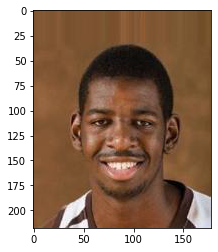

In [37]:
plt.imshow(Image.open(sample_test_image))

In [17]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 256, 256, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 128, 128, 64) 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

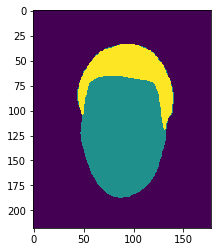

In [38]:
plt.imshow(Image.open(sample_test_annotaion))

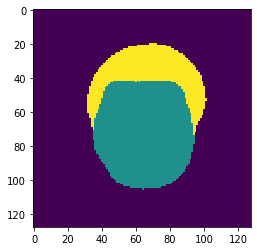

In [39]:
plt.imshow(last_out)

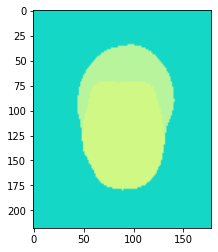

In [40]:
plt.imshow(Image.open(last_out_fname))

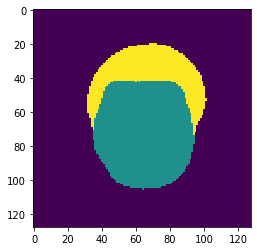

In [41]:
plt.imshow(best_val_loss_out)

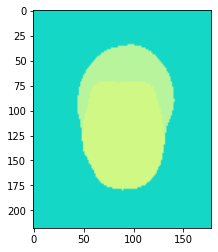

In [42]:
plt.imshow(Image.open(best_val_loss_out_fname))

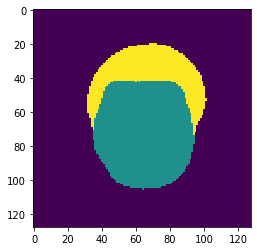

In [43]:
plt.imshow(best_val_acc_out)

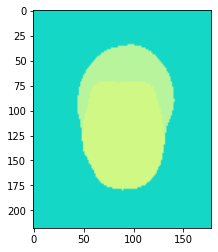

In [44]:
plt.imshow(Image.open(best_val_acc_out_fname))

In [20]:
model.n_classes

3

In [23]:
import cv2 

inp2 = sample_test_image
inp = cv2.imread(inp2)

assert len(inp.shape) == 3, "Image should be h,w,3 "
orininal_h = inp.shape[0]
orininal_w = inp.shape[1]



In [32]:
output_width = model.output_width
output_height = model.output_height
input_width = model.input_width
input_height = model.input_height
n_classes = model.n_classes



In [35]:
from keras_segmentation.data_utils.data_loader import get_image_array
import numpy as np

IMAGE_ORDERING_CHANNELS_LAST = "channels_last"
IMAGE_ORDERING = IMAGE_ORDERING_CHANNELS_LAST

x = get_image_array(inp, 218, 178, IMAGE_ORDERING)
pr = model.predict(np.array([x]))[0]
pr = pr.reshape((output_height,  output_width, n_classes)).argmax(axis=2)
#TODO



ValueError: Error when checking : expected input_1 to have shape (256, 256, 3) but got array with shape (3, 218, 178)

In [ ]:
seg_img = np.zeros((output_height, output_width, 3))
colors = class_colors

for c in range(n_classes):
    seg_img[:, :, 0] += ((pr[:, :] == c)*(colors[c][0])).astype('uint8')
    seg_img[:, :, 1] += ((pr[:, :] == c)*(colors[c][1])).astype('uint8')
    seg_img[:, :, 2] += ((pr[:, :] == c)*(colors[c][2])).astype('uint8')

seg_img = cv2.resize(seg_img, (orininal_w, orininal_h))